In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.simplefilter('ignore')

# Plotting settings
sns.set_style("white")
sns.set_style("ticks")
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['pdf.fonttype'] = 42
pkg_dir = '/home/mrossol/NaTGenPD'
sys.path.append(pkg_dir)
import NaTGenPD as npd
import NaTGenPD.cluster as cluster


data_dir = '/scratch/mrossol/CEMS'

# Cluster dev

In [2]:
comb_file = os.path.join(data_dir, 'SMOKE_Clean_2016-2017.h5')
with npd.CEMS(comb_file, mode='r') as f:
    #ng_ct = f['CT (NG)']
    #boiler = f['Boiler (Coal)']
    ng_cc = f['CC (NG)']
    #oil_cc = f['CC (Oil)']
    #oil_ct = f['CT (Oil)']

### Oil CT

1767


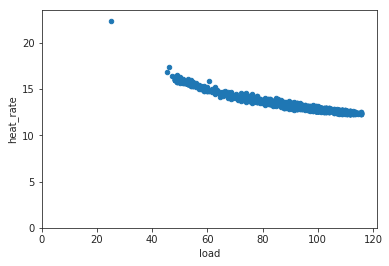

DEBUG - 2019-05-25 13:56:03,136 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.6


(0.6, 16)


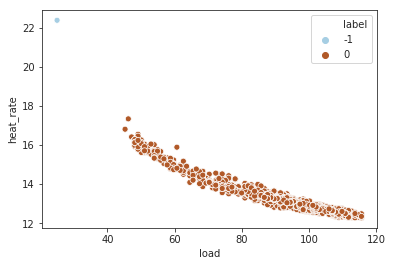

In [6]:
ct_df = oil_ct['1355_9']
#unit_df = ng_ct['120_CT5']
print(len(ct_df))
ct_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, ct_df['load'].max() * 1.05),
                     ylim=(0, ct_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(ct_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c._cluster(arr, min_samples=16, eps=.6)
print(cluster_params[1:])
labels = cluster_params[0]

c_df = ct_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

1767


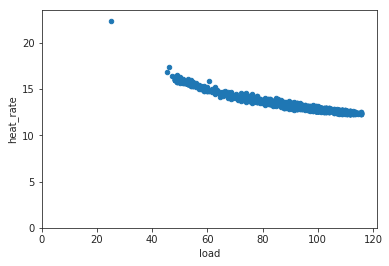

DEBUG - 2019-05-25 13:58:15,699 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.02902903306238341
DEBUG - 2019-05-25 13:58:15,710 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.03193193636862175
DEBUG - 2019-05-25 13:58:15,720 [cluster.py:482] : New best fit: min_samples=16, eps=0.03193193636862175, score=20.127080741401844
DEBUG - 2019-05-25 13:58:15,721 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.03512513000548393
DEBUG - 2019-05-25 13:58:15,731 [cluster.py:482] : New best fit: min_samples=16, eps=0.03512513000548393, score=29.30273241396427
DEBUG - 2019-05-25 13:58:15,732 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.03863764300603233
DEBUG - 2019-05-25 13:58:15,742 [cluster.py:482] : New best fit: min_samples=16, eps=0.03863764300603233, score=36.270052342076866
DEBUG - 2019-05-25 13:58:15,743 [cluster.py:419] : Set contains 1767 coordinates, N-neig

DEBUG - 2019-05-25 13:58:16,083 [cluster.py:482] : New best fit: min_samples=16, eps=0.6129125232126214, score=238.2001727865825
DEBUG - 2019-05-25 13:58:16,084 [cluster.py:419] : Set contains 1767 coordinates, N-neighbors required: 16 at 0.6742037755338834


(0.6129125232126214, 16)


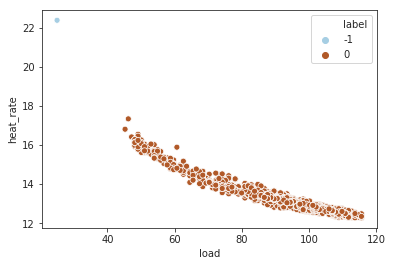

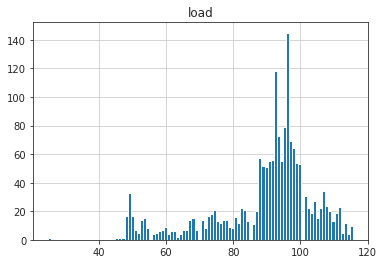

In [3]:
logger = npd.setup_logger('NaTGenPD.cluster', log_level='DEBUG')

ct_df = oil_ct['1355_9']
#unit_df = ng_ct['120_CT5']
print(len(ct_df))
ct_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, ct_df['load'].max() * 1.05),
                     ylim=(0, ct_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(ct_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c.optimize_clusters(min_samples=16)
print(cluster_params[1:])
labels = cluster_params[0]

c_df = ct_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

c_df.hist(column='load', bins=100)
plt.show()

### Missing CCs in cc_map

In [53]:
path = os.path.join(data_dir, 'Mappings', 'CEMS_mergeguide.csv')
cc_map = pd.read_csv(path)
cc_map['cc_unit'] = cc_map['EIAPlant'].astype(str) + '_' + cc_map['EIAUnit'].astype(str)
ng_ccs = ng_cc._unit_dfs.size()

In [54]:
pos = ng_ccs.index.isin(cc_map['cc_unit'])
missing_cts = ng_ccs.loc[~pos]
missing_cts = pd.DataFrame({'CEMSUnit': missing_cts.index})

In [55]:
CEMS_ccs = pd.read_csv(path)
CEMS_ccs = pd.concat((CEMS_ccs, missing_cts), sort=True)

In [56]:
out_path = '/home/mrossol/CEMS_ccs.csv'
CEMS_ccs.to_csv(out_path, index=False)

## Coal Boiler

13864


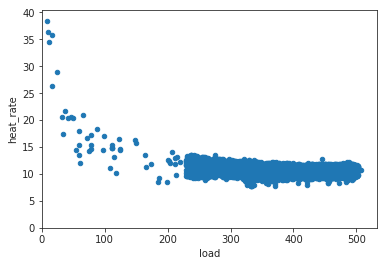

(0.03825264650630281, 13)
score = 310.0111


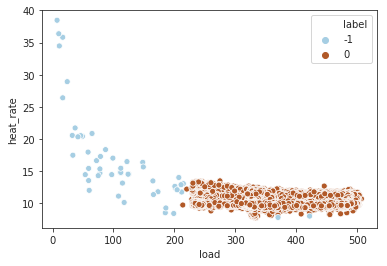

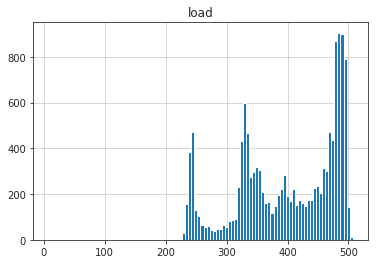

In [23]:
boiler_df = boiler['1001_1']
print(len(boiler_df))
boiler_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, boiler_df['load'].max() * 1.05),
                     ylim=(0, boiler_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(boiler_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c.optimize_clusters(min_samples=13)
print(cluster_params[1:])
labels = cluster_params[0]
print('score = {:.4f}'.format(c.cluster_score(arr, labels)))

c_df = boiler_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

c_df.hist(column='load', bins=100)
plt.show()

831


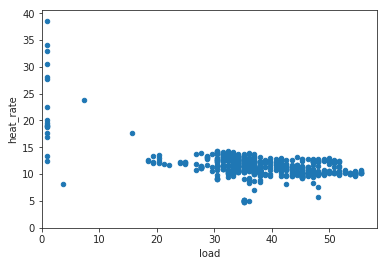

(0.052090194287591964, 16)
score = 67.5295


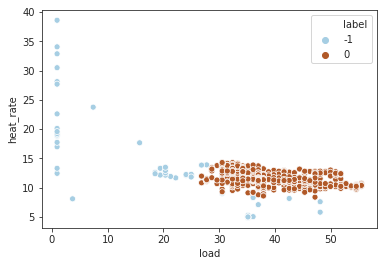

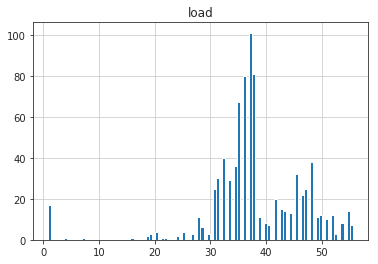

In [29]:
boiler_df = boiler['991_5']
print(len(boiler_df))
boiler_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, boiler_df['load'].max() * 1.05),
                     ylim=(0, boiler_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(boiler_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c.optimize_clusters(min_samples=16)
print(cluster_params[1:])
labels = cluster_params[0]
print('score = {:.4f}'.format(c.cluster_score(arr, labels)))

c_df = boiler_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

c_df.hist(column='load', bins=100)
plt.show()

## NG CT

8617


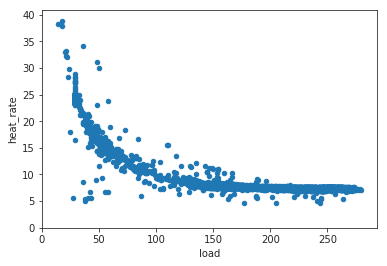

(0.01177746167957643, 16)


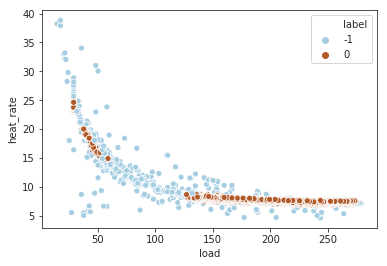

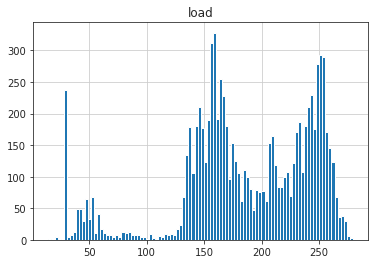

In [9]:
ct_df = ng_ct['1239_12']
#unit_df = ng_ct['120_CT5']
print(len(ct_df))
ct_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, ct_df['load'].max() * 1.05),
                     ylim=(0, ct_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(ct_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c.optimize_clusters(min_samples=16)
print(cluster_params[1:])
labels = cluster_params[0]

c_df = ct_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

c_df.hist(column='load', bins=100)
plt.show()

4411


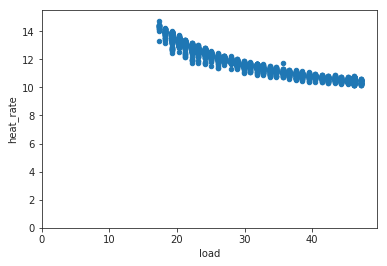

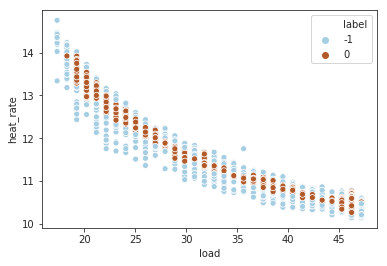

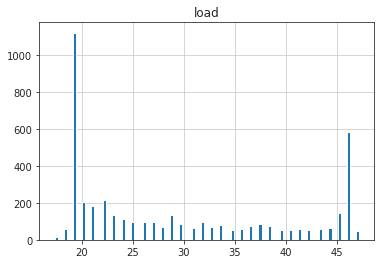

In [58]:
ct_df = ng_ct['120_CT5']
print(len(ct_df))
ct_df.plot.scatter(x='load', y='heat_rate',
                     xlim=(0, ct_df['load'].max() * 1.05),
                     ylim=(0, ct_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.SingleCluster(ct_df)
arr = c.get_data(['load', 'heat_rate'])
cluster_params = c.optimize_clusters(min_samples=17)
labels = cluster_params[0]

c_df = ct_df[['load', 'heat_rate']].copy()
c_df['label'] = cluster_params[0]
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

c_df.hist(column='load', bins=100)
plt.show()

## NG CC

12796


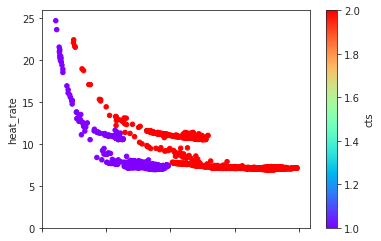

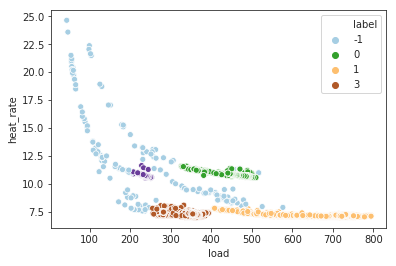

In [3]:
cc_df = ng_cc['55411_CC1']
print(len(cc_df))
cc_df.plot.scatter(x='load', y='heat_rate', c='cts',
                   colormap='rainbow',
                   xlim=(0, cc_df['load'].max() * 1.05),
                   ylim=(0, cc_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.ClusterCC(cc_df)
arr = c.unit_df[['load', 'heat_rate', 'cts']].values
labels = c.optimize_clusters(min_samples=17)

c_df = cc_df[['load', 'heat_rate']].copy()
c_df['label'] = labels
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()

7494


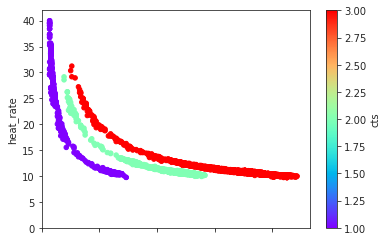

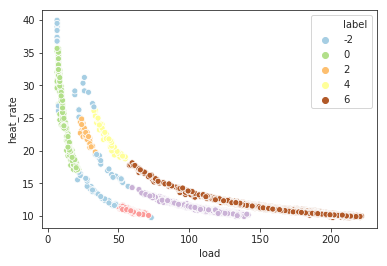

In [4]:
cc_df = ng_cc['1007_CC1']
print(len(cc_df))
cc_df.plot.scatter(x='load', y='heat_rate', c='cts',
                   colormap='rainbow',
                   xlim=(0, cc_df['load'].max() * 1.05),
                   ylim=(0, cc_df['heat_rate'].max() * 1.05))
plt.show()

c = cluster.ClusterCC(cc_df)
arr = c.unit_df[['load', 'heat_rate', 'cts']].values
labels = c.optimize_clusters(min_samples=17)

c_df = cc_df[['load', 'heat_rate']].copy()
c_df['label'] = labels
sns.scatterplot(x='load', y='heat_rate', hue='label', data=c_df,
                palette='Paired')
plt.show()